In [1]:
from inference import inference_ensemble

# generate alphabet
from spectrum_dataset import SpectrumDataset
SpectrumDataset(root_dir='processed/', 
                alphabet_path='config/amino_acid_alphabet.txt', 
                filenames=['AItrain_LumosSynthetic_2022418v2.ann.txt', 'AItrain_QEHumanCho_2022418v2.ann.txt'],
                generate_alphabet=True)

In [4]:
checkpoints = [
    'checkpoints/ensemble_1.pth',
    'checkpoints/ensemble_2.pth',
    'checkpoints/ensemble_3.pth',
]

files = ['TestUniq202277_202312.ann.txt']

losses = []
for file in files:
    file_losses = inference_ensemble(checkpoints, file, 'config/amino_acid_alphabet.txt', weights=None)

    losses.extend(file_losses)

Using device: mps
Ensemble size: 3 models
Processing: processed/TestUniq202277_202312.ann.txt
Dataset size: 2223
Loaded model from: checkpoints/ensemble_1.pth
Loaded model from: checkpoints/ensemble_2.pth
Loaded model from: checkpoints/ensemble_3.pth
Writing ensemble predictions to: predicted/ensemble_TestUniq202277_202312.ann.txt
Batch 1/139 | Samples: 16 | Batch Loss: 0.067825 | Running Avg Loss: 0.067825
Batch 50/139 | Samples: 800 | Batch Loss: 0.089358 | Running Avg Loss: 0.096197
Batch 100/139 | Samples: 1600 | Batch Loss: 0.085415 | Running Avg Loss: 0.086322
Batch 139/139 | Samples: 2223 | Batch Loss: 0.053253 | Running Avg Loss: 0.082338
Completed: 2223 samples | Final Avg Loss: 0.082338


In [3]:
print(f'Average loss: {sum(losses)/len(losses)}')

Average loss: 0.082601092872671


In [ ]:
train_losses, val_losses, test_losses = inference_splits()

Using device: mps
processing:  <_io.TextIOWrapper name='processed/FTMS_HCD_20_annotated_2019-11-12.ann.txt' mode='r' encoding='UTF-8'>
processing:  <_io.TextIOWrapper name='processed/FTMS_HCD_23_annotated_2019-11-12.ann.txt' mode='r' encoding='UTF-8'>
processing:  <_io.TextIOWrapper name='processed/FTMS_HCD_25_annotated_2019-11-12.ann.txt' mode='r' encoding='UTF-8'>
processing:  <_io.TextIOWrapper name='processed/FTMS_HCD_28_annotated_2019-11-12.ann.txt' mode='r' encoding='UTF-8'>
processing:  <_io.TextIOWrapper name='processed/FTMS_HCD_30_annotated_2019-11-12.ann.txt' mode='r' encoding='UTF-8'>
processing:  <_io.TextIOWrapper name='processed/FTMS_HCD_35_annotated_2019-11-12.ann.txt' mode='r' encoding='UTF-8'>
processing:  <_io.TextIOWrapper name='processed/IARPA3_best_tissue_add_info.ann.txt' mode='r' encoding='UTF-8'>
processing:  <_io.TextIOWrapper name='processed/IARPA3_good_tissue_add_info.ann.txt' mode='r' encoding='UTF-8'>
processing:  <_io.TextIOWrapper name='processed/IARPA3_s

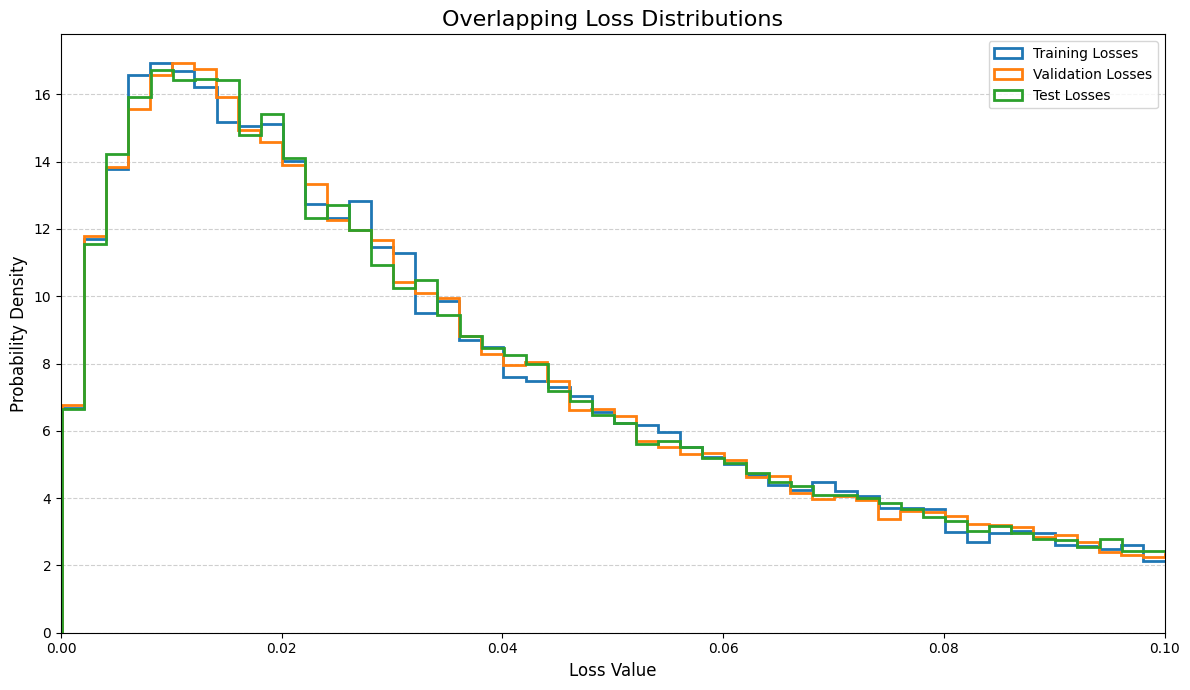

In [ ]:
import matplotlib.pyplot as plt

plot_data = [train_losses, val_losses, test_losses]
plot_labels = ['Training Losses', 'Validation Losses', 'Test Losses']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c'] # Defining colors for clarity

plt.figure(figsize=(12, 7))

# Plot each distribution using a loop to have more control over styling
for i in range(len(plot_data)):
    plt.hist(
        plot_data[i],
        bins=500,
        label=plot_labels[i],
        density=True,
        histtype='step',  # Changed from 'bar' to 'step' for clear outlines
        linewidth=2,      # Increased line width for better visibility
        color=colors[i]
    )

plt.title('Overlapping Loss Distributions', fontsize=16)
plt.xlabel('Loss Value', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.xlim(0, 0.1)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout() # Adjusts plot to prevent labels from overlapping
plt.show()

In [ ]:
import numpy as np

print(np.mean(train_losses))
print(np.mean(val_losses))
print(np.mean(test_losses))

0.07675936
0.07795552
0.07730109
